In [1]:
import numpy as np
import pandas as pd

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

Data Import

In [3]:
data=pd.read_csv(r"C:\Users\nikhil\Desktop\Iris.csv")
df=data.copy()

Data Analysis

In [4]:
df.shape

(150, 6)

In [5]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Drop id column we dont need it

In [9]:
df.drop("Id",axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Descriptive Statistics

In [11]:
desc=pd.DataFrame(round((df.describe().T),2))
desc

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.05,0.43,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.76,1.76,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


Visualization

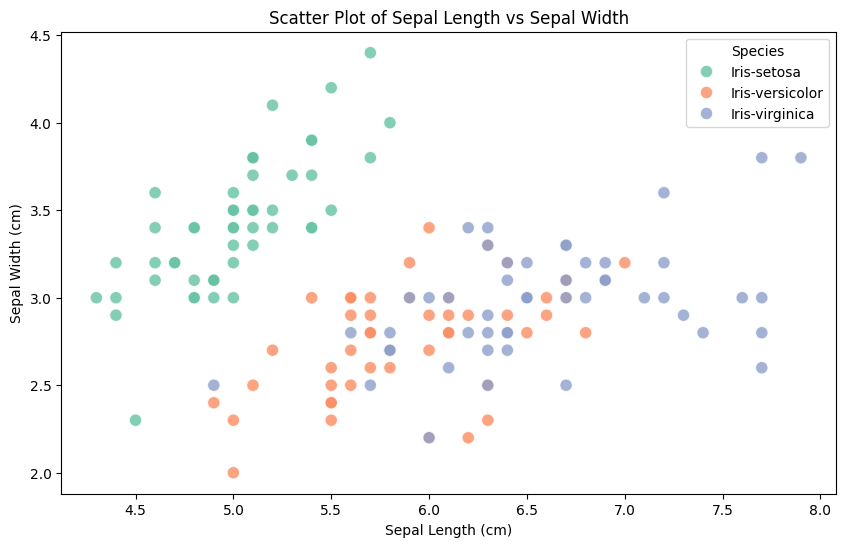

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue="Species", palette="Set2", s=80, alpha=0.8)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Species')
plt.show()

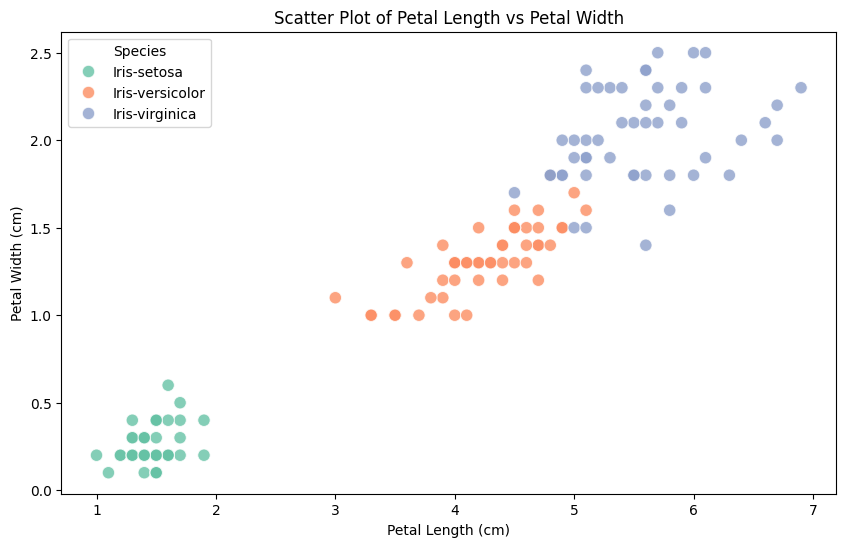

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue="Species", palette="Set2", s=80, alpha=0.8)
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

Encoding dependent variable

In [14]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Correlation Matrix

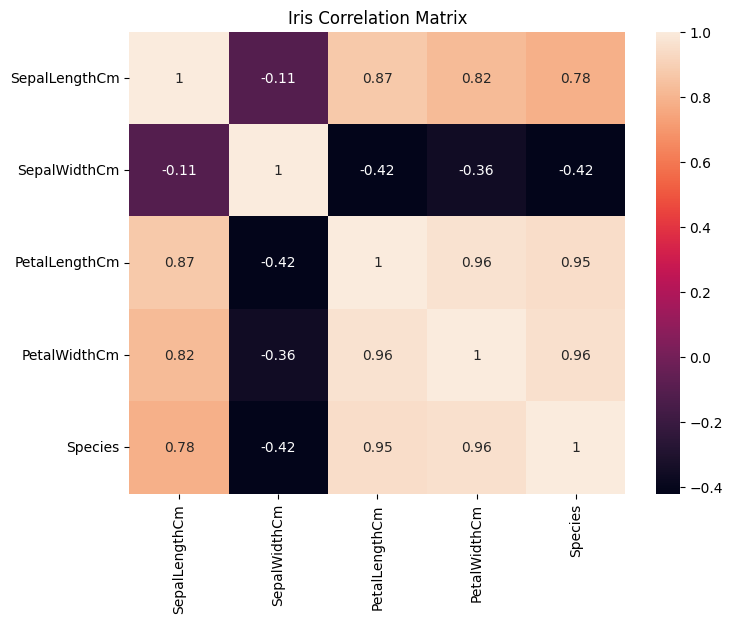

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="rocket", annot=True)
plt.title("Iris Correlation Matrix")
plt.show()

Train-Test Split

In [17]:
X=df.drop(["Species"],axis=1)
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=25)

In [18]:
X_train.shape

(112, 4)

In [19]:
X_test.shape

(38, 4)

In [20]:
y_train.shape

(112,)

Models Dictionary

In [21]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
}

Store Results

In [22]:
accuracy_scores = []
confusion_matrices = []
model_names = []

Iterate through models

In [23]:
for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")
    
    # Cross-validation
    cross_val_scores = cross_val_score(model_instance, X, y, cv=5, scoring='accuracy')
    mean_cv_score = round(cross_val_scores.mean(), 3)
  
    # Fit the model
    model_instance.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_instance.predict(X_test)
    
    # Calculate accuracy score
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Store model names
    model_names.append(model_name)
    
    # Print results
    print("Cross-Validation Mean Accuracy:", mean_cv_score)
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:\n", cm)
    print("\n")

-----KNeighborsClassifier-----
Cross-Validation Mean Accuracy: 0.973
Accuracy Score: 0.921
Confusion Matrix:
 [[11  0  0]
 [ 0 13  3]
 [ 0  0 11]]


-----LogisticRegression-----
Cross-Validation Mean Accuracy: 0.973
Accuracy Score: 0.974
Confusion Matrix:
 [[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


-----SVC-----
Cross-Validation Mean Accuracy: 0.967
Accuracy Score: 0.947
Confusion Matrix:
 [[11  0  0]
 [ 0 14  2]
 [ 0  0 11]]


-----RandomForestClassifier-----
Cross-Validation Mean Accuracy: 0.96
Accuracy Score: 0.947
Confusion Matrix:
 [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


-----AdaBoostClassifier-----
Cross-Validation Mean Accuracy: 0.947
Accuracy Score: 0.947
Confusion Matrix:
 [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


-----GradientBoostingClassifier-----
Cross-Validation Mean Accuracy: 0.96
Accuracy Score: 0.947
Confusion Matrix:
 [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


-----DecisionTreeClassifier-----
Cross-Validation Mean Accuracy: 0.953
Accuracy Score: 0.947
Confusion Matrix:
 [[11  0  

Save accuracy scores to DataFrame

In [24]:
results_df = pd.DataFrame({'Model': model_names, 'Accuracy Score': accuracy_scores})
results_df

,Model,Accuracy Score
0,KNeighborsClassifier,0.921
1,LogisticRegression,0.974
2,SVC,0.947
3,RandomForestClassifier,0.947
4,AdaBoostClassifier,0.947
5,GradientBoostingClassifier,0.947
6,DecisionTreeClassifier,0.947
7,XGBClassifier,0.921


Sort results in ascending order

In [25]:
results_df = results_df.sort_values(by='Accuracy Score')
results_df

,Model,Accuracy Score
0,KNeighborsClassifier,0.921
7,XGBClassifier,0.921
2,SVC,0.947
3,RandomForestClassifier,0.947
4,AdaBoostClassifier,0.947
5,GradientBoostingClassifier,0.947
6,DecisionTreeClassifier,0.947
1,LogisticRegression,0.974


Results Visualization

Text(0.5, 1.0, 'Accuracy Scores for Each Model (Ascending Order)')

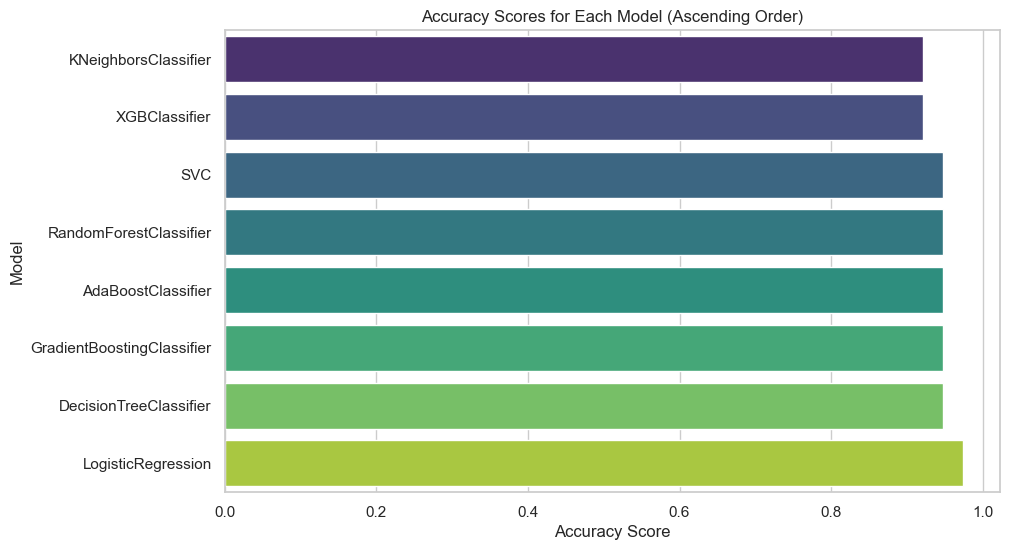

In [26]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Add a grid for better readability
ax = sns.barplot(x='Accuracy Score', y='Model', data=results_df, palette='viridis')
plt.xlabel("Accuracy Score")
plt.title("Accuracy Scores for Each Model (Ascending Order)")